In [39]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [40]:
civs_path = 'MiniProjectPhotos'

In [41]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

100


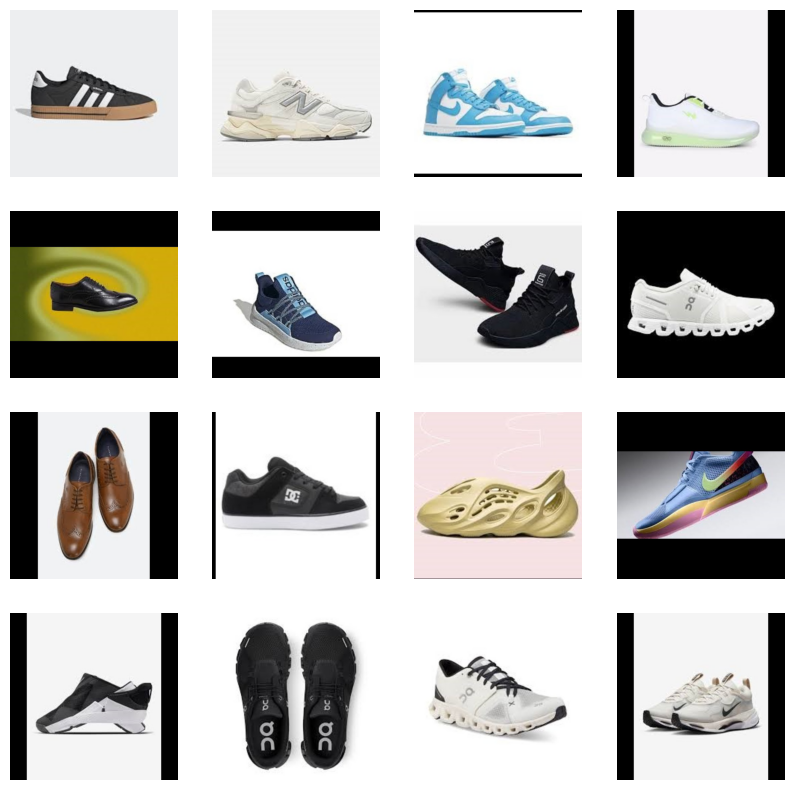

In [42]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [43]:
def label_func2(fname):
    print(fname)
    fname = fname.replace("MiniProjectPhotos","")
    temp_name = fname.replace(".jpg", "").split("_")
    # print(temp_name)
    
  
    y0 = temp_name[0]                              ## S
    y1 = float(temp_name[1].replace("R", ""))     ## 'Ng0'
    y2 = float(temp_name[2].replace("Y", ""))    ## 'Pci175'
    y3 = float(temp_name[3].replace("Bl", ""))     ## 'H0'
    y4 = float(temp_name[4].replace("W", ""))     ## 'Wp0'
    y5 = float(temp_name[5].replace("Br", ""))     ## 'Ph300'
    y6 = float(temp_name[6].replace("Bk", ""))    ## 'Ox24'
    y7 = float(temp_name[7].replace("G", ""))     ## 'Ow7
    y8 = float(temp_name[8].replace("O", ""))    ## 'Hbt1459.8'
    y9 = float(temp_name[9].replace("Pu", ""))    ## 'Wm12.2'
    y10 = float(temp_name[10].replace("Pi", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [fname, y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ]

In [44]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    #if temp_label_vector_rc[1] == "S":
    
        ## print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )

MiniProjectPhotos\S7_R0_Y0_Bl0_W15_Br10_Bk75_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S7_R0_Y0_Bl0_W15_Br10_Bk75_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S71_R0_Y3_Bl0_W90_Br0_Bk7_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S71_R0_Y3_Bl0_W90_Br0_Bk7_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S42_R0_Y0_Bl55_W45_Br0_Bk0_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S42_R0_Y0_Bl55_W45_Br0_Bk0_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S67_R0_Y5_Bl0_W80_Br0_Bk10_G5_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S67_R0_Y5_Bl0_W80_Br0_Bk10_G5_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S74_R0_Y30_Bl0_W0_Br0_Bk40_G30_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S74_R0_Y30_Bl0_W0_Br0_Bk40_G30_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S69_R0_Y0_Bl80_W20_Br0_Bk0_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S69_R0_Y0_Bl80_W20_Br0_Bk0_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S78_R5_Y0_Bl0_W10_Br0_Bk85_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S78_R5_Y0_Bl0_W10_Br0_Bk85_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S6_R0_Y0_Bl0_W100_Br0_Bk0_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S6_R0_Y0_Bl0_W100_Br0_Bk0_G0_O0_Pu0_Pi

MiniProjectPhotos\S94_R0_Y0_Bl0_W25_Br0_Bk75_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S20_R0_Y0_Bl0_W80_Br0_Bk20_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S20_R0_Y0_Bl0_W80_Br0_Bk20_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S63_R0_Y0_Bl0_W4_Br0_Bk96_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S63_R0_Y0_Bl0_W4_Br0_Bk96_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S34_R0_Y10_Bl0_W5_Br0_Bk70_G0_O5_Pu0_Pi0.jpg
MiniProjectPhotos\S34_R0_Y10_Bl0_W5_Br0_Bk70_G0_O5_Pu0_Pi0.jpg
MiniProjectPhotos\S12_R0_Y0_Bl5_W90_Br0_Bk5_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S12_R0_Y0_Bl5_W90_Br0_Bk5_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S77_R0_Y0_Bl0_W60_Br20_Bk10_G0_O0_Pu10_Pi0.jpg
MiniProjectPhotos\S77_R0_Y0_Bl0_W60_Br20_Bk10_G0_O0_Pu10_Pi0.jpg
MiniProjectPhotos\S21_R1_Y2_Bl90_W2_Br0_Bk5_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S21_R1_Y2_Bl90_W2_Br0_Bk5_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S70_R0_Y0_Bl0_W88_Br0_Bk12_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S70_R0_Y0_Bl0_W88_Br0_Bk12_G0_O0_Pu0_Pi0.jpg
MiniProjectPhotos\S41_R0_Y5_Bl0_W0_Br90_Bk0_G0_O0_Pu0_Pi0

In [45]:
X =  list_imgs
y =  list_label_vectors 
print(X,y)

[array([[238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=uint8), array([[241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241],
       [240, 240, 240, ..., 240, 240, 240],
       ...,
       [240, 240, 240, ..., 240, 240, 240],
       [241, 241, 241, ..., 241, 241, 241],
       [241, 241, 241, ..., 241, 241, 241]], dtype=uint8), array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [55, 55, 55, ..., 55, 55, 55],
       ...,
       [55, 55, 55, ..., 55, 55, 55],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

80
20
80
20


In [47]:
X_train[76]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]
    target[ 5 ] = reg_vals[7]
    target[ 6 ] = reg_vals[8]
    target[ 7 ] = reg_vals[9]
    target[ 8 ] = reg_vals[10]
    target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

In [49]:
list_imgs_train[3]

array([[238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=uint8)

In [50]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (10) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    target[ 2 ] = reg_vals[4]
    target[ 3 ] = reg_vals[5]
    target[ 4 ] = reg_vals[6]
    target[ 5 ] = reg_vals[7]
    target[ 6 ] = reg_vals[8]
    target[ 7 ] = reg_vals[9]
    target[ 8 ] = reg_vals[10]
    target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [51]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [52]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(80, 10)
(20, 10)


## Save data for Development

In [53]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")

In [54]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")

In [55]:
list_imgs_train[17]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
list_imgs_train[17].shape


(140, 39)

In [57]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [58]:
list_imgs_train_stretched[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [59]:
list_imgs_train_stretched[4].shape

(5460,)

In [60]:
list_imgs_train_stretched[4][:1000]

array([  0,   0,   0,  35, 237, 247, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 247, 237,  35,   0,   0,   0,
         0,   0,   0,  35, 237, 247, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 247, 237,  35,   0,   0,   0,
         0,   0,   0,  35, 237, 247, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 247, 237,  35,   0,   0,   0,
         0,   0,   0,  35, 237, 247, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 247, 237,  35,   0,   0,   0,
         0,   0,   0,  35, 237, 247, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 24

In [61]:
list_imgs_train_stretched[7].shape

(5460,)

## Keeps scale at 0.255

In [62]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [63]:
np_list_imgs_train_stretched.shape

(80, 5460)

In [64]:
np_list_imgs_train_stretched[3]

array([238, 238, 238, ..., 238, 238, 238], dtype=uint8)

In [65]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [66]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459
0,0,0,0,35,237,247,245,245,245,245,...,245,245,245,245,247,237,35,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
3,238,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238
4,0,0,0,35,237,247,245,245,245,245,...,245,245,245,245,247,237,35,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,20,158,153,153,164,181,187,184,...,9,19,102,175,134,57,37,2,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
78,0,0,0,35,234,243,241,241,241,241,...,241,241,241,241,243,234,35,0,0,0


In [67]:
DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")

## Follow Web tool logic

In [68]:
url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [69]:
url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [70]:
url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

## KNN Part

In [71]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [72]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [73]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )

[[  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  30.   0.  70.   0.   0.   0.   0.]
 [  0.   0.   0.  60.  20.  10.   0.   0.  10.   0.]
 [  0.   1.   0.  99.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  67.  18.  15.   0.   0.   0.   0.]
 [  0.  10.   0.  55.   0.  25.  10.   0.   0.   0.]
 [  0.   0.   0.  35.   0.  65.   0.   0.   0.   0.]
 [  0.   0.   0.  99.   0.   1.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  15.  10.  75.   0.   0.   0.   0.]]


In [74]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

[76 58 15]
[[243 243 243 ... 243 243 243]
 [243 243 243 ... 243 243 243]
 [243 243 243 ... 243 243 243]
 ...
 [243 243 243 ... 243 243 243]
 [243 243 243 ... 243 243 243]
 [243 243 243 ... 243 243 243]]
<PIL.Image.Image image mode=L size=39x140 at 0x24F76246B50>


Text(0.5, 1.0, 'real')

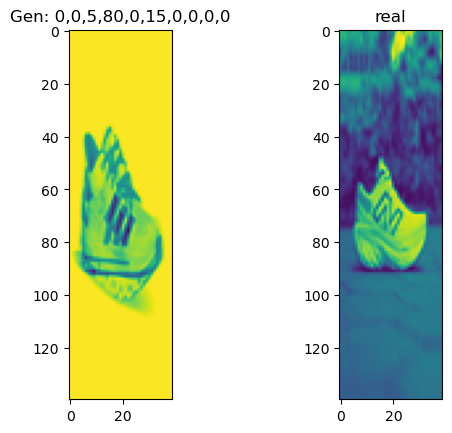

In [75]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(17)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

[49 21 20]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<PIL.Image.Image image mode=L size=39x140 at 0x24F762C3CD0>
[47 16 68]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<PIL.Image.Image image mode=L size=39x140 at 0x24F6B5DAF50>
[22 30 17]
[[ 72  75 142 ... 136  71  71]
 [ 72  75 142 ... 136  71  71]
 [ 72  75 142 ... 136  71  71]
 ...
 [ 76  78 145 ... 140  75  75]
 [ 76  78 145 ... 140  75  75]
 [ 76  78 145 ... 140  75  75]]
<PIL.Image.Image image mode=L size=39x140 at 0x24F014E6990>
[49 21 20]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<PIL.Image.Image image mode=L size=39x140 at 0x24F762D3610>
[22 17 15]
[[152 154 221 ... 216 151 151]
 [152 154 221 ... 216 151 151]
 [152 154 221 ... 216 151 151]
 ...
 [155 158 225 ... 219 155 155]
 [155 158 225 ... 219 15

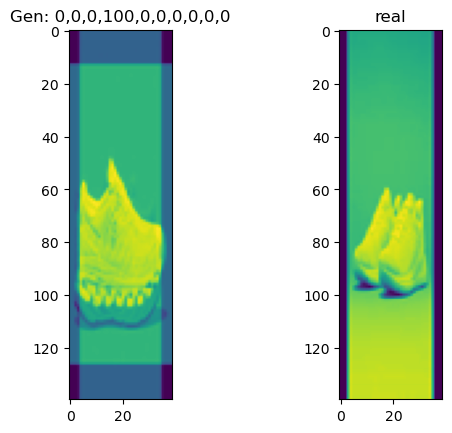

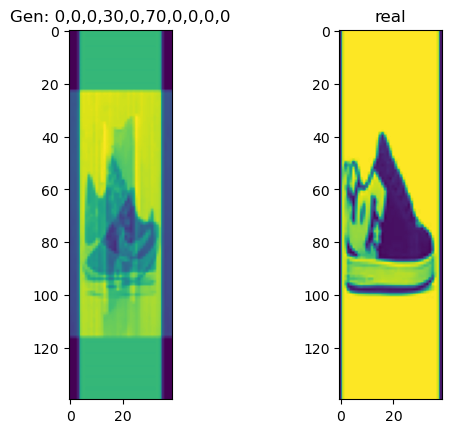

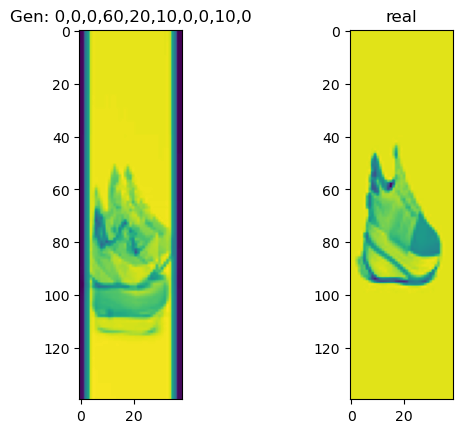

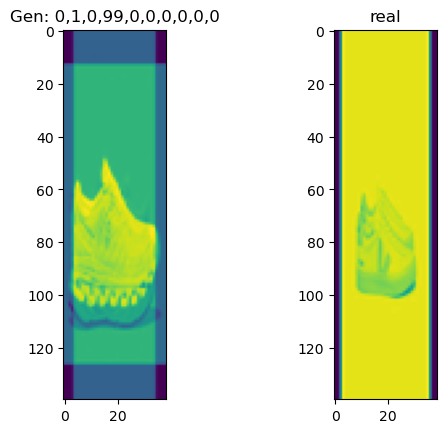

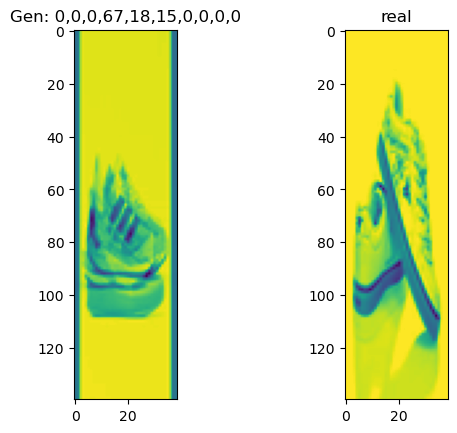

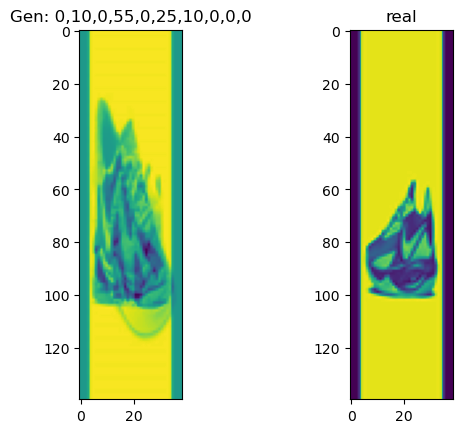

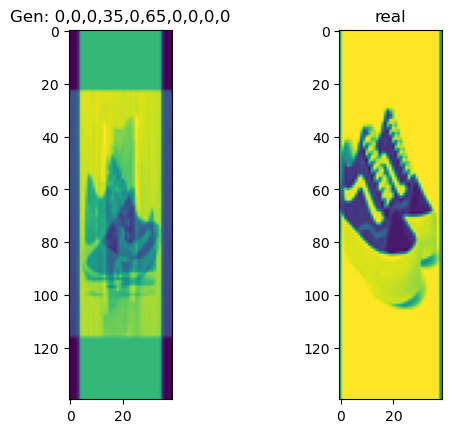

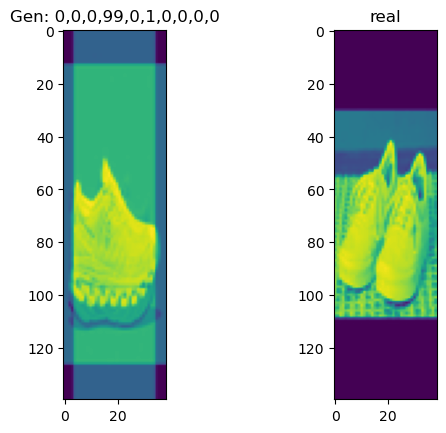

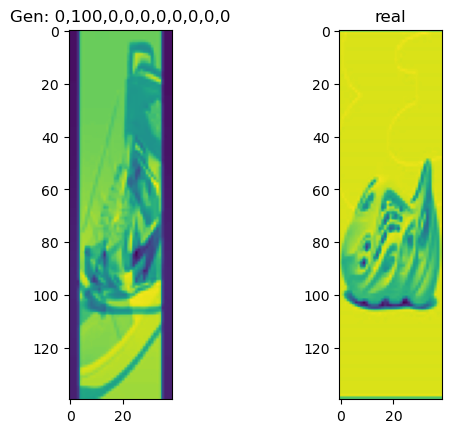

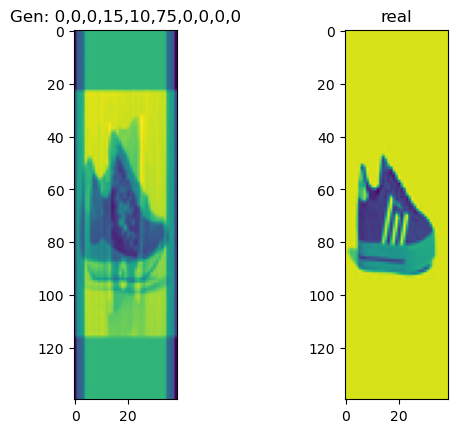

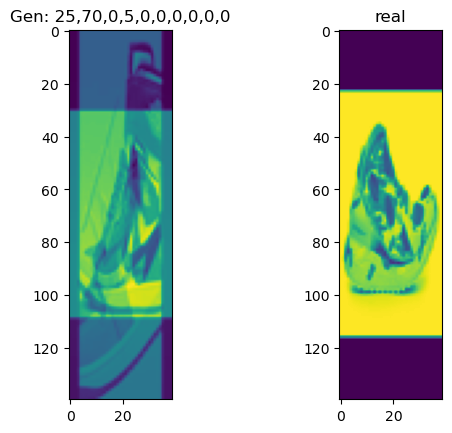

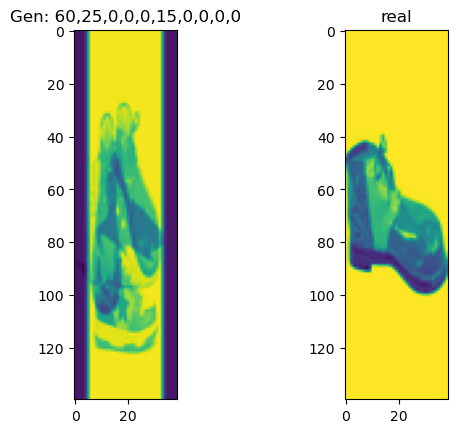

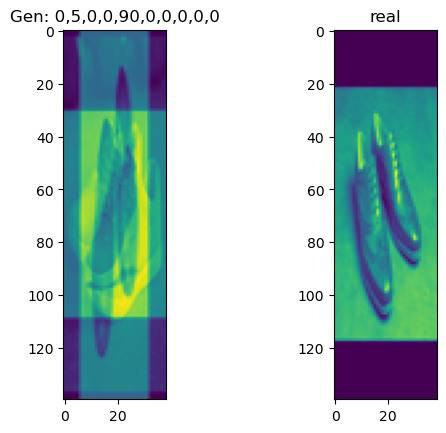

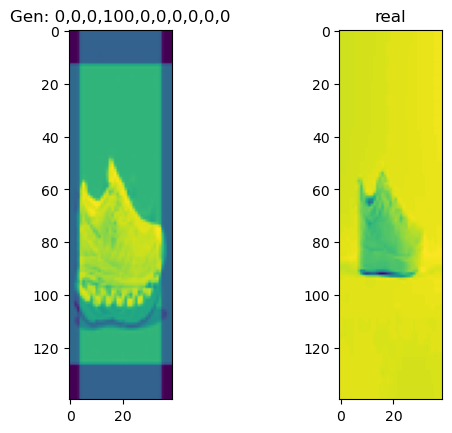

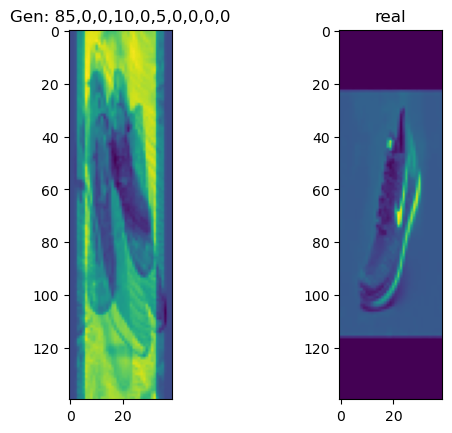

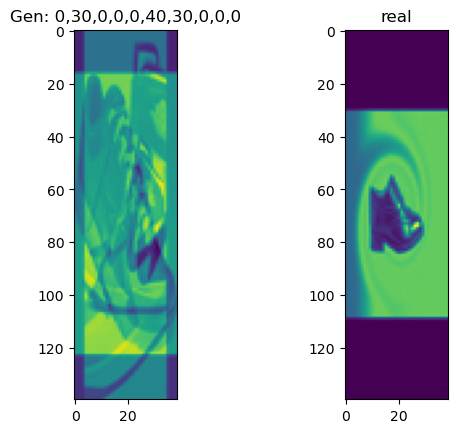

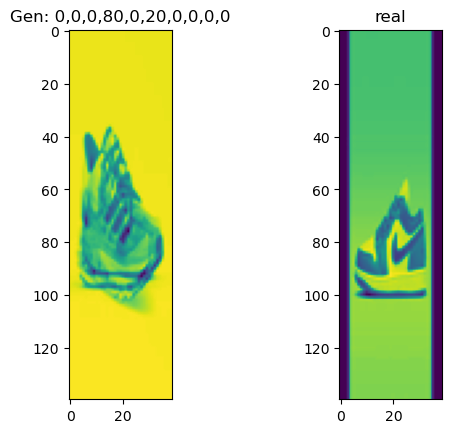

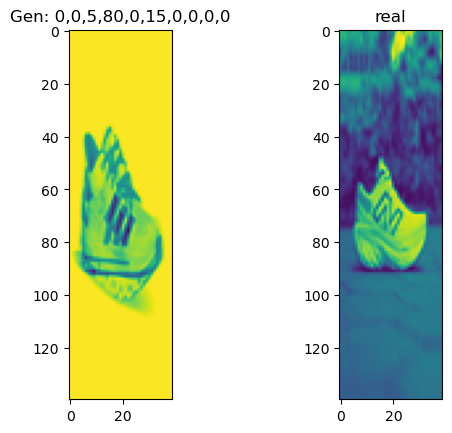

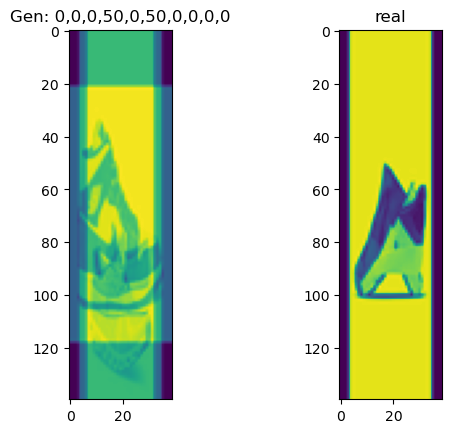

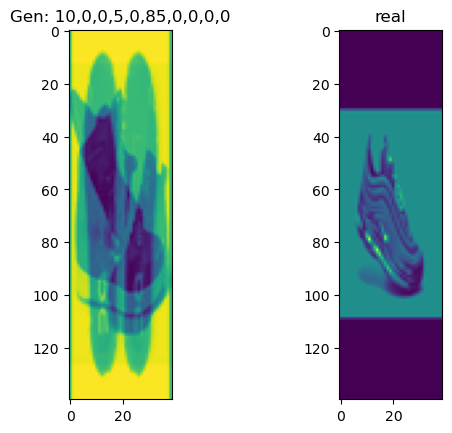

In [76]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")